In [1]:
## Importing libraries
import pandas as pd
#pd.date_range("1/1/2020",periods = 1000)

In [2]:
## loading the data
data=pd.read_csv('sales-cars.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   36 non-null     object
 1   Sales   36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes


In [4]:
data.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [5]:
data.shape

(36, 2)

In [6]:
## parsing the date and using date column as index
data=pd.read_csv('sales-cars.csv',parse_dates=[0],index_col='Month')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


In [8]:
data.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [9]:
data.shape

(36, 1)

In [10]:
## Plotting the data
import matplotlib.pyplot as plt

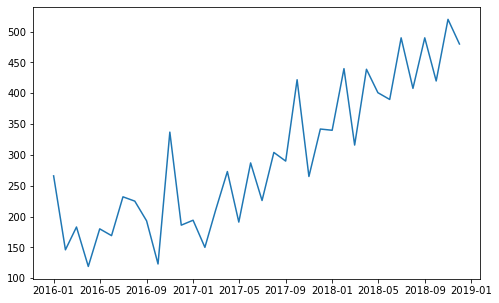

In [11]:
plt.figure(figsize=(8,5))
plt.plot(data);
## from plot we can see the series given is not stationary

In [36]:
# !pip install statsmodels

In [13]:
## Plotting the autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

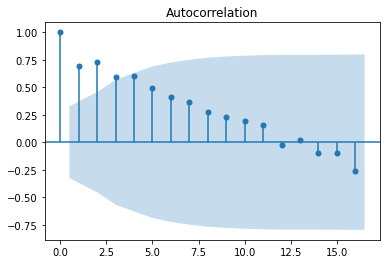

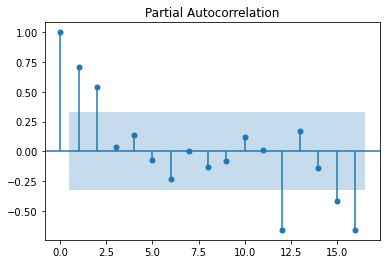

In [14]:
plot_acf(data);
plot_pacf(data);
## from the autocorrelation plot it is clear that given series is not stationary

In [15]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1)

In [16]:
data1=data1.iloc[1:]

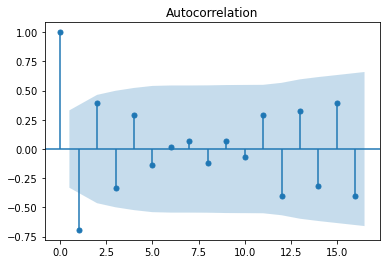

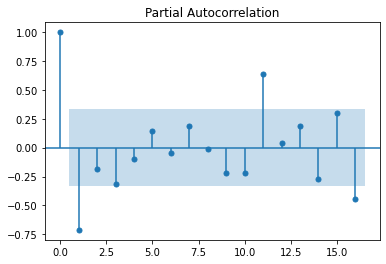

In [18]:
plot_acf(data1);
plot_pacf(data1);

In [19]:
## Creating training and test sets
train=data1[:27]
test=data1[27:]

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 2016-02-01 to 2018-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   27 non-null     float64
dtypes: float64(1)
memory usage: 432.0 bytes


In [21]:
data1.shape

(35, 1)

In [22]:
## Applying autoregressive model
from statsmodels.tsa.ar_model import AR

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
## model creation
ar_model=AR(train) ## object creation
ar_model_fit=ar_model.fit()

In [25]:
##making prediction
prediction=ar_model_fit.predict(start=27,end=34)

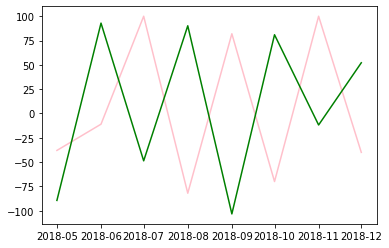

In [26]:
plt.plot(test,color='pink')
plt.plot(prediction,color='green') #lot of difference

## ARIMA Model

In [27]:
## importing the library
from statsmodels.tsa.arima_model import ARIMA

In [28]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))

model_arima_fit = model_arima.fit()

In [29]:
## evaluate the model
print(model_arima_fit.aic)

317.87726394170437


In [30]:
## predicting the out of sample points---predicting 9 days data
predictions = model_arima_fit.forecast(steps=9)[0]

In [31]:
predictions

array([-78.30967851,  93.64269015, -45.18242947,  74.74537785,
       -20.7641606 ,  63.09915095,  -2.38313588,  56.47952557,
        11.81274705])

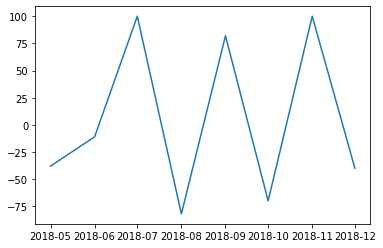

In [32]:
## plotting the test data
plt.plot(test)


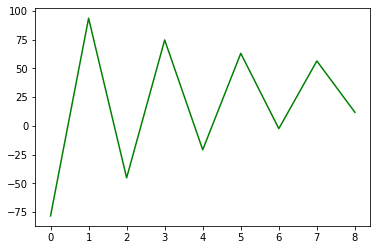

In [33]:
## plotting the forecasted values
plt.plot(predictions,color='green')

In [34]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [35]:
import warnings
warnings.filterwarnings('ignore')

for params in pdq:
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 324.39820432750815
(0, 0, 1) 308.00821837537865
(0, 0, 2) 306.8574915860821
(0, 0, 3) 308.85219774084806
(0, 0, 4) 309.9156877851511
(0, 1, 0) 343.4127008785868
(0, 1, 1) 318.2411242187953
(0, 1, 2) 300.55774457552485
(0, 1, 3) 303.1374765264144
(0, 2, 0) 362.1275778032357
(0, 2, 1) 336.5965598169498
(0, 2, 2) 315.2793395511653
(0, 2, 3) 304.70013402280506
(1, 0, 0) 309.1895633585401
(1, 0, 1) 306.858942618171
(1, 0, 2) 306.9919932365923
(1, 0, 3) 311.96210604622655
(1, 0, 4) 309.256618934352
(1, 1, 0) 317.87726394170437
(1, 1, 1) 304.3610563324495
(1, 1, 2) 299.61348079625384
(1, 2, 0) 329.7824543367003
(2, 0, 0) 310.54360833046763
(2, 0, 1) 308.7289296304584
(2, 0, 4) 311.32916564576755
(2, 1, 0) 317.29615611430387
(2, 1, 1) 305.7736241078515
(2, 2, 0) 326.965472536337
(3, 0, 0) 305.3298372236886
(3, 0, 1) 306.59572370177136
(3, 0, 2) 303.54044727062677
(3, 0, 3) 305.3517090320784
(3, 0, 4) 307.14753639579374
(3, 1, 0) 309.8732180733855
(3, 1, 1) 300.25385509396835
(3, 1, 2

In [36]:
## create the final model with lowest AIC score parameter
train=data1[:27]
test=data1[27:]

In [37]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(3,1,3))

model_arima_fit = model_arima.fit()

In [38]:
## evaluate the model
print(model_arima_fit.aic)

298.96224962108363


In [39]:
##making prediction
prediction=model_arima_fit.predict(start=27,end=34)

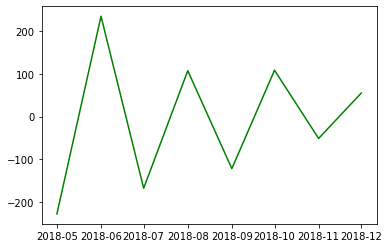

In [40]:
#plt.plot(test,color='pink')
plt.plot(prediction,color='green') #lot of difference

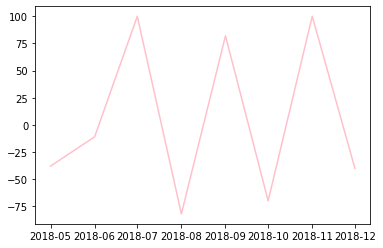

In [41]:
#plt.plot(test,color='pink')
plt.plot(test,color='pink') #lot of difference

In [42]:
## predicting the out of sample points---predicting 9 days data
predictions = model_arima_fit.forecast(steps=9)[0]

In [43]:
predictions

array([-104.57078286,  129.90038574,  -37.69305369,   69.45292303,
        -52.22187729,   56.08064813,    4.91919408,   59.8184482 ,
         -8.78288544])

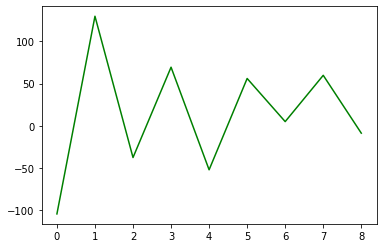

In [44]:
## plotting the forecasted values
plt.plot(predictions,color='green')

In [45]:
## MA model

In [46]:
data=pd.read_csv('sales-cars.csv',parse_dates=[0])

In [47]:
data['Moving_Avg']=data.Sales.rolling(window=2).mean()

In [48]:
data.head()

,Month,Sales,Moving_Avg
0,2016-01-01,266,NaN
1,2016-02-01,146,206.0
2,2016-03-01,183,164.5
3,2016-04-01,119,151.0
4,2016-05-01,180,149.5


In [49]:
data.columns

Index(['Month', 'Sales', 'Moving_Avg'], dtype='object')

In [50]:
data.isna().sum()

Month         0
Sales         0
Moving_Avg    1
dtype: int64

<AxesSubplot:xlabel='Month'>

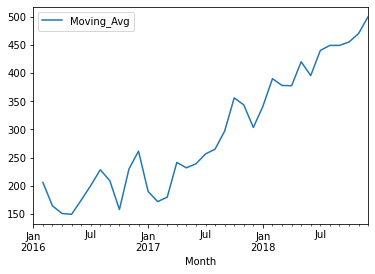

In [51]:
data.plot.line('Month','Moving_Avg')

<AxesSubplot:xlabel='Month'>

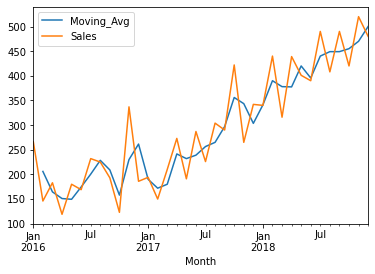

In [52]:
data.plot.line(x='Month',y=['Moving_Avg','Sales'])

In [53]:
data["Rolling_Avg"]= data.Sales.rolling(window=2,center=True).mean()

In [54]:
data.head()

,Month,Sales,Moving_Avg,Rolling_Avg
0,2016-01-01,266,NaN,NaN
1,2016-02-01,146,206.0,206.0
2,2016-03-01,183,164.5,164.5
3,2016-04-01,119,151.0,151.0
4,2016-05-01,180,149.5,149.5


<AxesSubplot:xlabel='Month'>

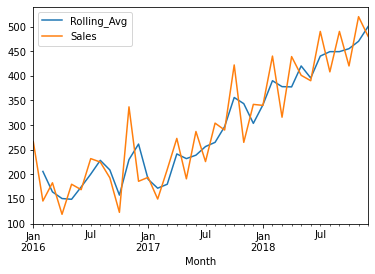

In [55]:
data.plot(x='Month',y=['Rolling_Avg','Sales'])

predicted=206.000000, expected=183.000000
predicted=164.500000, expected=119.000000
predicted=151.000000, expected=180.000000
predicted=149.500000, expected=169.000000
predicted=174.500000, expected=232.000000
predicted=200.500000, expected=225.000000
predicted=228.500000, expected=193.000000
predicted=209.000000, expected=123.000000
predicted=158.000000, expected=337.000000
predicted=230.000000, expected=186.000000
predicted=261.500000, expected=194.000000
predicted=190.000000, expected=150.000000
predicted=172.000000, expected=210.000000
predicted=180.000000, expected=273.000000
predicted=241.500000, expected=191.000000
predicted=232.000000, expected=287.000000
predicted=239.000000, expected=226.000000
predicted=256.500000, expected=304.000000
predicted=265.000000, expected=290.000000
predicted=297.000000, expected=422.000000
predicted=356.000000, expected=265.000000
predicted=343.500000, expected=342.000000
predicted=303.500000, expected=340.000000
predicted=341.000000, expected=440

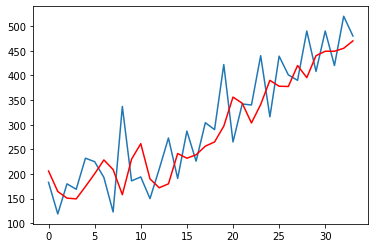

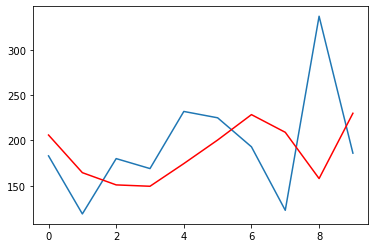

In [57]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from numpy import mean
from math import sqrt
df = pd.read_csv('sales-cars.csv', header=0, index_col=0)
# prepare situation
X = df.values
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
## walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = sqrt(mean_squared_error(test, predictions))
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:10])
pyplot.plot(predictions[0:10], color='red')
pyplot.show()